# Initial setup and pre-processing

In [10]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
con = sqlite3.connect('../data/database.db')
df = pd.read_sql_query('SELECT * FROM client;', con, index_col='id')

df['birthNumber'] = df['birthNumber'].astype('int64')
df['sex'] = df['birthNumber'].apply(lambda x: 'female' if x / 100 % 100 > 50 else 'male')
df['birthNumber'] = df['birthNumber'].apply(lambda x: 19000000 + x - 5000 if x / 100 % 100 > 50 else 19000000 + x)
df['birthNumber'] = pd.to_datetime(df['birthNumber'], format='%Y%m%d')
df.head()

,birthNumber,districtId,sex
id,,,
1,1970-12-13,18,female
2,1945-02-04,1,male
3,1940-10-09,1,female
4,1956-12-01,5,male
5,1960-07-03,5,female


# Analyzing birthNumber

In [4]:
df.sort_values('birthNumber', ascending=False).iloc[:10]

,birthNumber,districtId,sex
id,,,
3428,1987-09-27,42,female
4354,1986-08-13,28,male
10201,1985-10-19,13,male
3417,1985-03-18,35,female
734,1985-01-14,46,female
4530,1984-09-18,37,female
379,1983-10-13,50,female
4170,1983-08-27,58,male
1338,1983-07-26,56,male


There are multiple people that aren't old enough to own a credit/debit card on their own.

Is it possible that there's people with more than 100 years (e.g. client with `id` 3428 being born in 1887 instead of 1987)?

Text(0.5, 1.0, 'Number of clients per decade of birth')

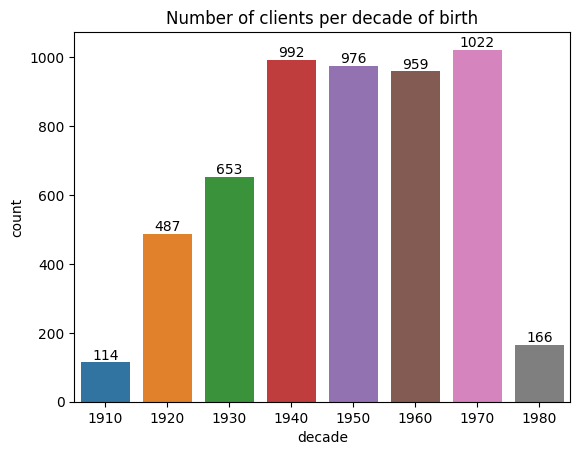

In [17]:
ax = sns.countplot(df, x=df['birthNumber'].dt.year//10*10)
ax.bar_label(ax.containers[0])
plt.xlabel('decade')
plt.title('Number of clients per decade of birth')

The majority of the clients were born between 1940 and 1970, 27 to 57 years old (max).

In [6]:
df[df.duplicated(keep=False)].sort_values('birthNumber')

,birthNumber,districtId,sex
id,,,
2502,1935-03-13,1,female
4805,1935-03-13,1,female
13285,1935-12-25,34,male
4177,1935-12-25,34,male
25,1939-04-23,21,female
9196,1939-04-23,21,female
46,1940-01-30,19,female
9217,1940-01-30,19,female
9174,1940-10-09,1,female


In [7]:
df.duplicated().sum()

26

We have 26 duplicates, each with exactly two copies. Are they related (e.g. do they have the same account)?

In [8]:
temp = pd.read_sql_query('SELECT client.id, birthNumber, districtId, accountId, type FROM disp JOIN client ON client.id=clientId;', con, index_col='id')
temp[temp.duplicated(subset=['birthNumber', 'districtId', 'accountId'], keep=False)]

,birthNumber,districtId,accountId,type
id,,,,


There's no relation whatsoever.

# Analyzing sex

[Text(0, 0, '2645'), Text(0, 0, '2724')]

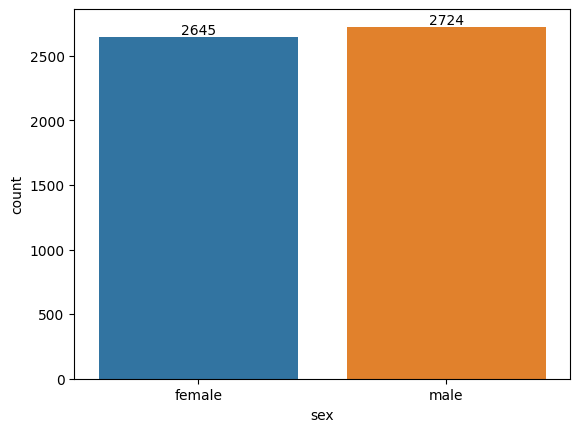

In [9]:
ax = sns.countplot(df, x='sex')
ax.bar_label(ax.containers[0])

The data is balanced when it comes to the `sex` attribute.